

# Project: Investigate a Dataset - [Noshowappointments-kagglev2-may-2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1. ScheduledDay- tells us on what day the patient set up their appointment.
2. Neighborhood- indicates the location of the hospital.
3. Scholarship- indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. Based on True or      False
4. PatientId -Identification of a patient
5. AppointmentID- Identification of each appointment
6. Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
7. Age -How old is the patient.
8. Hipertension- is the patient suffering from hipertension?. Based on True or False.
9. Diabetes - is the patient diabetic? Based on True or False.
10. Alcoholism - is the patient Alcoholic? Based on True or False
11. Handcap - is the patient disabled? Based on True or False
12. SMS_received - was message for appointment sent to the patient? Based on True or False
13. No-show - Did the patient honor the appointment? Based on True or False ie Yes or No
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


### Question(s) for Analysis
##### 1. What is the mean age of patients who showed up and those who didn't show up for their Appointment?
##### 2. What is the effect of scholarship on patient's appointment honoring?
##### 3. Are Alcholic people more likely not to show up for appointments as compared to non-alcoholic?
##### 4. What is the Correlation between Sms_received and No_show?



In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [108]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [109]:
# Loading Data to inspect it.

df= pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [110]:
#Checking the number of rows and columns on the dataset
df.shape

(110527, 14)

### Let's check for.

Correct datatypes in each column.
Correct naming conventions.
Missing values

In [111]:
# Checking for missing values and the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No missing values since each row has an equal number as the other

Let's check for unique values in each column using the unique(). This will help us understand the contents of the dataset.

In [112]:
# Checking for unique values in the Neighbourhood column
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [113]:
# Checking for unique values in the age column
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

Since age can only be from integer value 0 and above, any value less than 0 is considered to be an anomaly. Hence it needs to be dropped. The assumption made in age value 0 is that, these are young children under one year old.

In [114]:
# Checking for unique values in the Gender column
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [115]:
# Checking for unique values in the Scholarship column
df.Scholarship.unique()

array([0, 1])

In [116]:
# Checking for unique values in the Hipertension column
df.Hipertension.unique()

array([1, 0])

In [117]:
# Checking for unique values in the Diabetes column
df.Diabetes.unique()

array([0, 1])

In [118]:
# Checking for unique values in the Alcoholism column
df.Alcoholism.unique()

array([0, 1])

In [119]:
# Checking for unique values in the SMS_received column
df.SMS_received.unique()

array([0, 1])

In [120]:
# Checking for unique values in the No-show column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

Note that in the No-show Column, ‘No’ means the patient showed up to their appointment, and ‘Yes’ if they did not show up to their appointment.

Which can be encoded in boolean to mean: 'No' = True and 'Yes' = False.

In [121]:
# Checking for unique values in the Handcap column
df.Handcap.unique()

array([0, 1, 2, 3, 4])

Based on the Author of the dataset, Handcap is based on True or False, which is repressnted as 1 or 0. Therefore, the occurence of 2, 3, and 4 can be treated as anomaly data which needs to be discared in the data cleaning phase. However, before dropping the rows, let's validate that dropping the rows with (2,3, and 4) won't affect the structure of the dataset.

In [122]:
# Checking the total number of 2's in the Handcap column
df.query('Handcap == 2')['Handcap'].value_counts()

2    183
Name: Handcap, dtype: int64

In [123]:
# Checking the total number of 3's in the Handcap column
df.query('Handcap == 3')['Handcap'].value_counts()

3    13
Name: Handcap, dtype: int64

In [124]:
# Checking the total number of 4's in the Handcap column
df.query('Handcap == 4')['Handcap'].value_counts()

4    3
Name: Handcap, dtype: int64

From the results, the rows with 2, 3 and 4 datas are not many enough to affect the overall dataset. This justifies that the rows can be dropped.

In [125]:
#Checking for duplicates.
df.AppointmentID.duplicated().value_counts()

False    110527
Name: AppointmentID, dtype: int64

I used AppointmentID specifically to check for duplicates because it is the primary key (unique identifier) in the above dataset. Since the result returned is 0, it means there is no instance of two or more patients sharing the same appointment. However, this does not prove that a patient cannot have two or more appointments. A patient can appear twice or more times for appointment without duplicating the data as long as the other rows do not contain the same data as the previous rows.

However, the other columns can have instances of duplicates because of possibilty of repeated data in the rows

In [126]:
#Checking if there is null values in each column in the dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Based on the results above, there are no null values meaning each row is filled with correct data.

#### In the above Findings, we have the following issues to solve.
1. Drop the patientid and appointmentid since they are not point of interest based on our research questions.
2. ScheduleDay to be changed from Object to Datetime
3. AppointmentDay to be changed from Object to Datetime.
4. Replace the "-" (dash) in No-show with "_" (underscore).
5. Change all the columns from mixedcase to lowercase for consistency.
6. Change No-show column datatype from string to boolean and then to integer for easy Analysis.
7. Drop anomaly data in the Handcap and Age column.



### Data Cleaning

#### The following are tasks for the Data Cleaning process.
1. Droping the patientid and appointmentid.
2. Changing ScheduleDay datatype from Object to Datetime.
3. Changing AppointmentDay datatype from Object to Datetime.
4. Replacing dash with underscore on the No-show columnname.
5. Changing all the column names from mixedcase to lowercase.
6. Converting the No-show datatype from String to boolean and then to integer.
7. Droping data anomalies.


In [127]:
# Deleting the PatientId and AppointmentId column.
df.drop(['PatientId','AppointmentID'], axis=1, inplace = True)

In [128]:
#Confirming the results
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [129]:
# Changing the Datatype of appointmentday Column from Object to Datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [130]:
# Confirming the results
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [131]:
# Changing the column names from uppercase to lowercase and repacing the dash on No-show column with underscore.
df.rename(columns= lambda x:x.strip().lower().replace("-","_"), inplace=True)

In [132]:
#Confirming the results
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [133]:
# Converting the string datatype of the No_show column to boolean
df = df.replace({'no_show': {'Yes': False, 'No': True}})

In [134]:
# Converting the boolean datatype of the no_show column to integer
df['no_show'] = df['no_show'].map({False: 0 ,True:1})

#Confirming results
df.no_show.dtype

dtype('int64')

In [135]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [136]:
#Dropping the data anomalies in the handcap column
df = df[df.handcap != 2]
df = df[df.handcap != 3]
df = df[df.handcap != 4]

In [137]:
#Confirming number 2 in Handcap has been dropped
df.query('handcap== 2')['handcap'].value_counts()

Series([], Name: handcap, dtype: int64)

In [138]:
#Confirming number 3 in Handcap has been dropped
df.query('handcap== 3')['handcap'].value_counts()

Series([], Name: handcap, dtype: int64)

In [139]:
#Confirming number 4 in Handcap has been dropped
df.query('handcap== 4')['handcap'].value_counts()

Series([], Name: handcap, dtype: int64)

In [140]:
#Dropping data anomalies in the age column
df =df[df.age != -1]

In [141]:
# Checking the newshape of the dataframe after cleaning.
df.shape

(110327, 12)


After dropping the unwanted rows(data anomalies), our new dataframe follows the shape (110327 rows, 12 columns)

<a id='eda'></a>
## Exploratory Data Analysis


Now that we have cleaned our data, lets perform analysis to find patterns and insights from the data.

We shall answer the following reseach questions.
1. What is the mean age of patients who showed up and those who didn't show up for their Appointment?
2. What is the effect of scholarship on patient's appointment honoring?
3. Are Alcholic people more likely not to show up for appointments as compared to non-alcoholic?
4. What is the Correlation between Sms_received and No_show?


In [142]:
# To get a descriptive statistics summary of a given dataframe.
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.798073
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


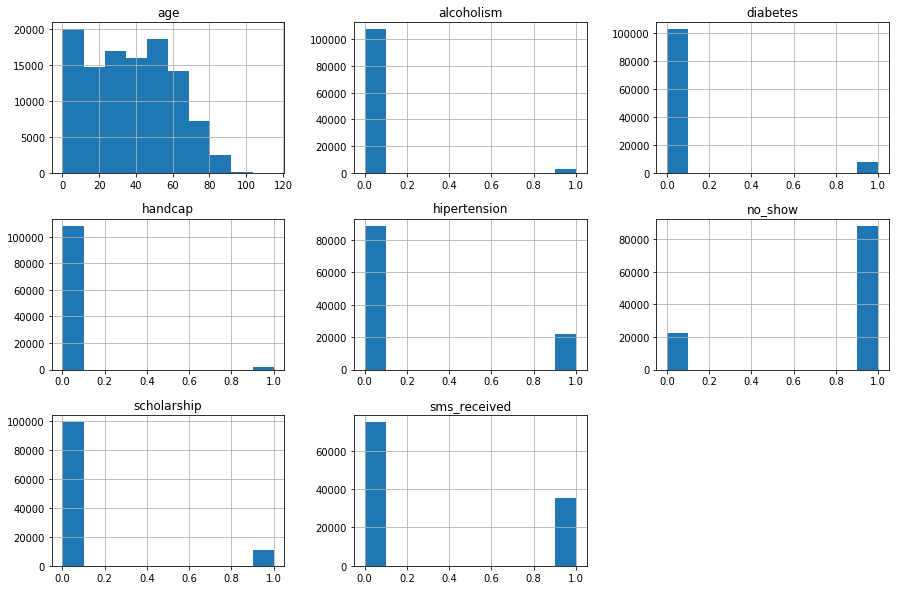

In [143]:
# Creating histograms of each variable to understand how data in each column is distributed.

df.hist(figsize=(15,10));

The age histogram is right skewed because the peak of the graph lies to the left side of the center. Meaning majority of the patients are less than 60 years.

The Alcoholism histogram shows that most patients are non_alcoholic, through having over 100,000 patients while the alcoholic being less than 10,000 of the total population.

The diabetes histogram shows most patients are not suffering from diabetes, through having over 100,000 patients while those suffering from diabetes being less than 20,000 of the total population.

The handcap histogram shows that most patients are not disabled, through having over 100,000 patients while the disabled being around less than 10%  of the total population.

The hipertension histogram shows that over 75% of most patients are not suffering from hipertension.

The no_show histogram shows most patients actually showed up for their appointments taking almost 80% of the patients population.

The scholarship histogram shows most patients are not enrolled on the Brasilian Welfare program Bolsa Familia with their population being around 100,000 patients.

The sms_received histogram shows most patients didn't receive sms for their appointments taking around 70% of the patients total population.




### Research Question 1 (What is the mean age of patients who showed up and those who didn't show up for their Appointment?)

In [144]:
# Creating a new dataframe from the column no_show to separate those who showed up and those who didn't show up for the appointment

showedup =df.no_show == 1
notshowedup= df.no_show == 0

In [145]:
# Let's find the mean age of those who showedup for the appointment.
df.age[showedup].mean()

37.77709002941544

In [146]:
# Let's find the mean age of those who didn't showup for the appointment.
df.age[notshowedup].mean()

34.27910943531735

In [147]:
# Plotting to show the age Distribution of patients who showedup and who didn't show up for the appointment.

# Defining a function called Histogram function with an argument (m) passed on.
def Histogram(m):
    df.age[showedup].hist(alpha=1, bins=20, label='showedup')
    df.age[notshowedup].hist(alpha=1, bins=20, label='notshowedup')
    plt.title(m)
    plt.xlabel('Age (in Years)')
    plt.ylabel('Number of Patients')
    plt.legend();

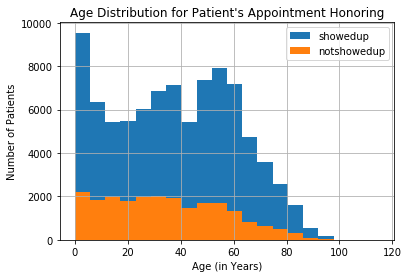

In [148]:
# Plotting the Age and No_show distribution by Calling the function Histogram with the argument (m) labelling the histogram title.

Histogram("Age Distribution for Patient's Appointment Honoring")

From the age and No_show distribution, majority of patients who showed up are from age 0-60 years: while facing a steep decline from 65 years onwards. 

The patients who didn't show up had a normal shape from age 0 upto 40 and faced steep decline in numbers from age 40 onwarsds.

### Research Question 2  (What is the effect of scholarship on patient's appointment honoring?)

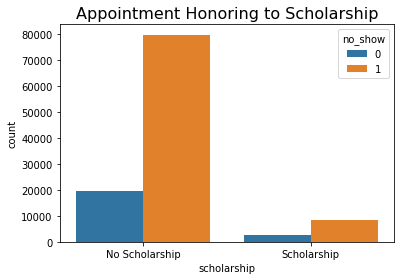

In [149]:
# Plotting count of patients honoring appointments to that of scholarship.

sch =sns.countplot(x="scholarship", hue="no_show",  data=df)  
sch.set_title("Appointment Honoring to Scholarship", size='16')
x_ticks_labels=['No Scholarship', 'Scholarship']
sch.set_xticklabels(x_ticks_labels)
plt.show();


For easy explanation of the visualizations, lets explore the numerical values represented from the graph above.

In [150]:
# Lets check the number of those who showed up based on their scholarship status
print(df.groupby("no_show")['scholarship'].value_counts()[1]);


scholarship
0    79783
1     8266
Name: scholarship, dtype: int64


Above analysis shows that majority of patients; a population of 79,783 despite not being on scholarship showed up for their appointments while those who showed up while on scholarship being 8,266. 

In [151]:
# Lets check the number of those who didn't show up based on their scholarship status.
print(df.groupby("no_show")['scholarship'].value_counts()[0]);

scholarship
0    19701
1     2577
Name: scholarship, dtype: int64


The above analysis shows that 19701 patients failed to show up for their appointments whilst not being on scholarship 
while 2577 patients failed to show up for their appointment despite being on scholarship

### Research Question 3(Are Alcholic people more likely to show up for appointments as compared to non-alcoholic?)

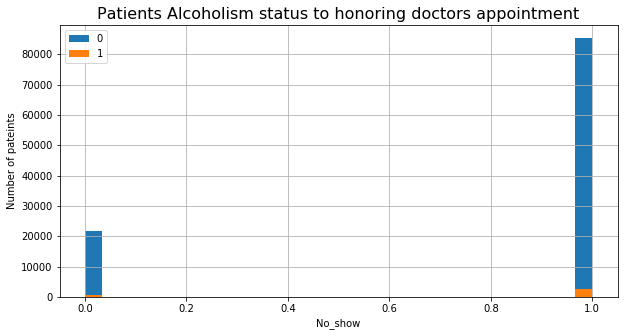

In [152]:
# Plotting by groupby function to show the relationship between patients alcoholism and honoring doctors appointment.

plt.figure(figsize=(10,5))
df.groupby('alcoholism')['no_show'].hist(bins=30)
plt.title('Patients Alcoholism status to honoring doctors appointment', size = '16')
plt.legend(df.alcoholism.unique())
plt.xlabel("No_show")
plt.ylabel("Number of pateints");



Let's look for the statistical and numerical figures from the above graph. This helps to provide insights and accurate numbers from the visualization.

In [153]:
# # Lets check the number of those who showed up based on their alcoholism status
print(df.groupby("no_show")['alcoholism'].value_counts()[0]);

alcoholism
0    21603
1      675
Name: alcoholism, dtype: int64


Above analysis shows that 21,603 non-alcoholic patients failed to honor their appointment while accompanied by 675 alcoholic patients who did not honor thjeir appointments either.

In [154]:
print(df.groupby("no_show")['alcoholism'].value_counts()[1]);

alcoholism
0    85372
1     2677
Name: alcoholism, dtype: int64


Above analysis shows that 85,375 non_alcoholic patients honored their appointment (about 97% of the total patients who honored their appointment) meanwhile 2677 alcoholic patients honored their appointment too. 

### Research Question 4(What is the Correlation between Sms_received and No_show)

In [ ]:
# Finding the correlation between the different variables through a Correlation Matrix.
# This will plot the correlation as a heatmap as shown below.

corr = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot = True, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title('Correlation heatmap', size='16')
plt.xticks(rotation='45');

In the above heatmap the light color shows the high correlation between the values and the darker colors shows less correlation between the variables.

<a id='conclusions'></a>
## Conclusions



##### 1. Most people Averaging the age of 37 years honored their appointments while those averaging 34 years didn't honor their appointmnets.                   From the age  and no_show variables distribution data, it shows that there is a steep decline of patients from age 65 and above who                           showed up for their appointments while majority who showed up being from Age 0 to 60 years
##### 2. Majority of people honored their appointments dispite not being on scholarship, 
##### 3. Most Non-alcoholic people honored their appointments as compared to Alcoholics.
##### 4. There is a negative Correlation between sms_received and no_show columns of -0.126678.


## Limitations.
1. Correlation does not imply Causation: Just because there is a correlation between 2 variables, doesn’t mean that one causes the other. Therefore, an increase in age doesn't mean it increases the chances of suffering from diabetes.





#### References
How to Convert String to Integer in Pandas DataFrame- https://www.geeksforgeeks.org/how-to-convert-string-to-integer-in-pandas-dataframe/

How to plot Correlation Matrix in Pandas Python- https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])